## Image Thresholding

<h3>
    <ul>
        <li>In this tutorial, you will learn Simple thresholding, Adaptive thresholding, Otsu's thresholding etc.</li>
        <li>You will learn these function : cv2.threshold, cv2.adaptiveThreshold etc.</li>
    </ul>
</h3>

### Simple Thresholding

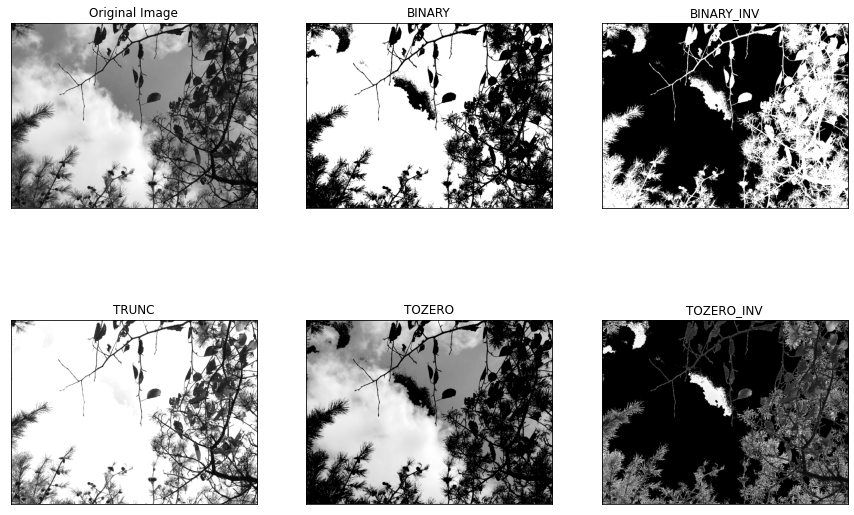

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

plt.figure (figsize = (15, 10))

img = cv2.imread ('sIMG_2180.jpg', 0)
ret, thresh1 = cv2.threshold (img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold (img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold (img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold (img, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold (img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range (6) :
    plt.subplot (2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title (titles[i])
    plt.xticks ([]), plt.yticks([])
    
plt.show()



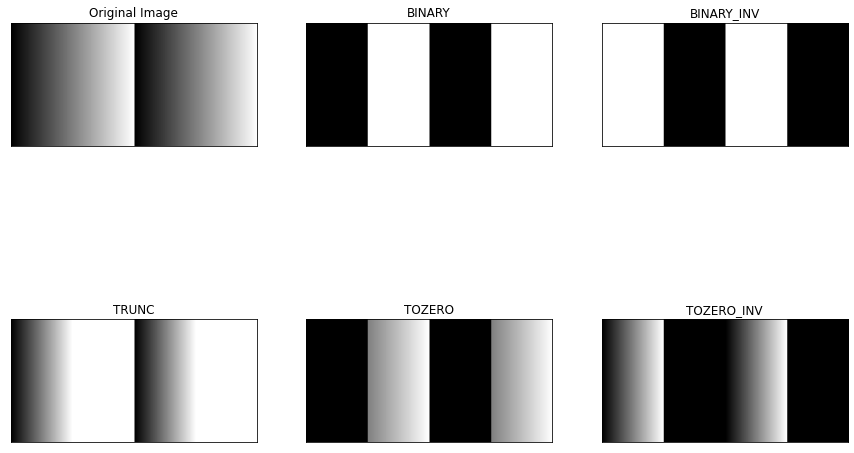

In [7]:
import cv2
import numpy as np

h,w = 256, 512
img = np.zeros ((h,w), np.uint8)
for i in range (h) :
    for j in range (w) :
        img [i, j] = (j) % 256
        
cv2.imshow ('image', img)
cv2.waitKey (0)
cv2.destroyAllWindows ()

plt.figure (figsize = (15, 10))

ret, thresh1 = cv2.threshold (img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold (img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold (img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold (img, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold (img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range (6) :
    plt.subplot (2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title (titles[i])
    plt.xticks ([]), plt.yticks([])
    
plt.show()

### Adaptive Thresholding

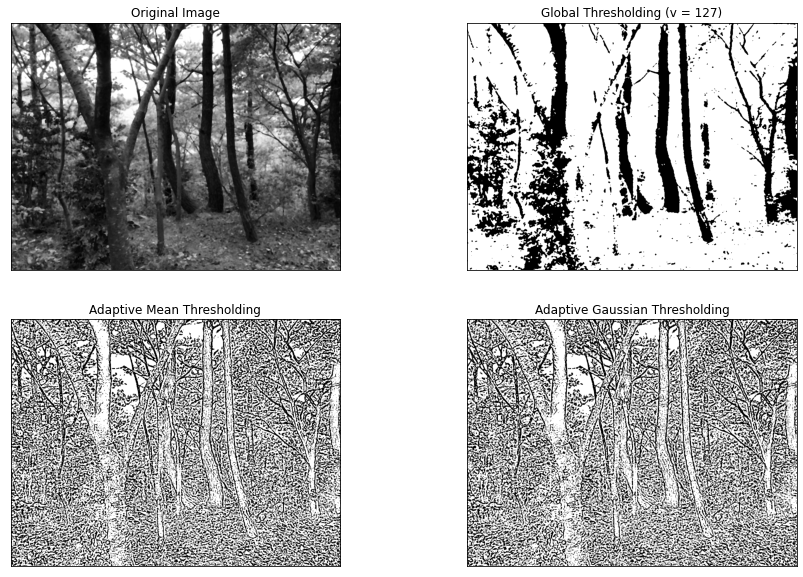

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread ('sIMG_2177.jpg', 0)
img = cv2.medianBlur (img, 5)

ret, th1 = cv2.threshold (img, 48, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold (img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 2)
th3 = cv2.adaptiveThreshold (img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 7, 2)

titles = ['Original Image', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

plt.figure (figsize = (15, 10))

for i in range (4) :
    plt.subplot (2, 2, i+1), plt.imshow (images[i], 'gray')
    plt.title (titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.show()

### Otsu's Binarizaion

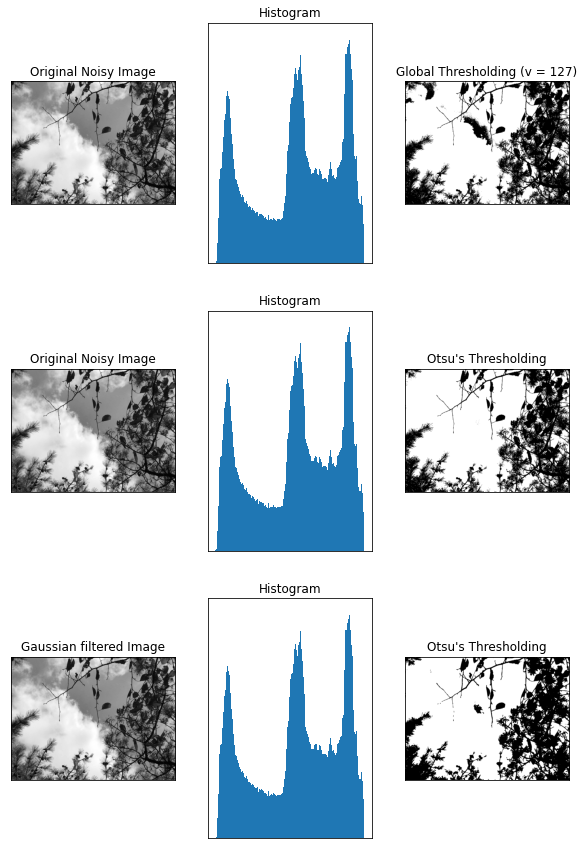

In [61]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread ('sIMG_2180.jpg', 0)

#global thresholding
ret1, th1 = cv2.threshold (img, 127, 255, cv2.THRESH_BINARY)

# Otsu's thresholding
ret2, th2 = cv2.threshold (img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur (img, (5, 5), 0)
ret3, th3 = cv2.threshold (blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
         img, 0, th2,
         img, 0, th3]

titles = ['Original Noisy Image', 'Histogram', 'Global Thresholding (v = 127)',
         'Original Noisy Image', 'Histogram', "Otsu's Thresholding",
         'Gaussian filtered Image', 'Histogram', "Otsu's Thresholding"]

plt.figure (figsize = (10, 15))

for i in range (3) :
    plt.subplot (3, 3, i*3+1), plt.imshow (images[i*3], 'gray')
    plt.title (titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot (3, 3, i*3+2), plt.hist (images[i*3].ravel(), 256)
    plt.title (titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot (3, 3, i*3+3), plt.imshow (images[i*3+2], 'gray')
    plt.title (titles[i*3+2]), plt.xticks([]), plt.yticks([])
    
plt.show()

## Histogram

In [24]:
import cv2
import numpy as np

img = cv2.imread ('sIMG_2180.jpg', 0)

h,w = img.shape
img
hist = np.zeros(256, np.uint32)
hist

for i in range (h) :
    for j in range (w) :
        hist[img[i,j]] += 1
hist

array([   1,   14,   56,  193,  634, 1413, 2266, 2679, 2843, 2986, 3021,
       3298, 3533, 3774, 4029, 4340, 4559, 4751, 5101, 5323, 5401, 5489,
       5337, 5243, 5221, 5095, 4626, 4510, 4127, 3796, 3586, 3319, 3113,
       2980, 2709, 2665, 2628, 2585, 2506, 2510, 2403, 2283, 2193, 2200,
       2230, 2110, 2076, 2151, 2099, 2043, 1951, 1935, 1917, 1986, 1973,
       1879, 1856, 1794, 1906, 1803, 1764, 1744, 1688, 1647, 1737, 1698,
       1688, 1646, 1709, 1594, 1569, 1619, 1630, 1594, 1489, 1587, 1570,
       1549, 1532, 1564, 1545, 1529, 1411, 1504, 1433, 1503, 1454, 1379,
       1403, 1350, 1444, 1510, 1341, 1362, 1371, 1393, 1399, 1384, 1374,
       1342, 1441, 1402, 1324, 1376, 1362, 1344, 1349, 1383, 1390, 1355,
       1391, 1338, 1374, 1408, 1346, 1431, 1504, 1645, 1817, 1909, 2135,
       2446, 2838, 3458, 3570, 3760, 4095, 4499, 4805, 5079, 5123, 5258,
       5278, 5420, 5576, 6033, 6043, 6218, 6119, 6012, 5810, 5829, 5907,
       6159, 6261, 6703, 6635, 6576, 6035, 5678, 53

## Excersize Draw Histogram

In [81]:
import cv2
import numpy as np

img = cv2.imread ('sIMG_2180.jpg', 0)
h,w = img.shape
hist = np.zeros(256, np.uint32)

for i in range (h) :
    for j in range (w) :
        hist[img[i,j]] += 1
        if m < img[i,j] :
            m = img[i, j]
        
h,w,ch = 256, 512, 3

draw = np.zeros((h, w, ch), np.uint8)

for i in range (256) :
        draw = cv2.rectangle (draw, (2*i, h), (2*(i+1), h-(hist[i]//30)), (0, 255, 0), -1)
        
cv2.imshow ('draw', draw)
cv2.waitKey (0)
cv2.destroyAllWindows()

## with Noise

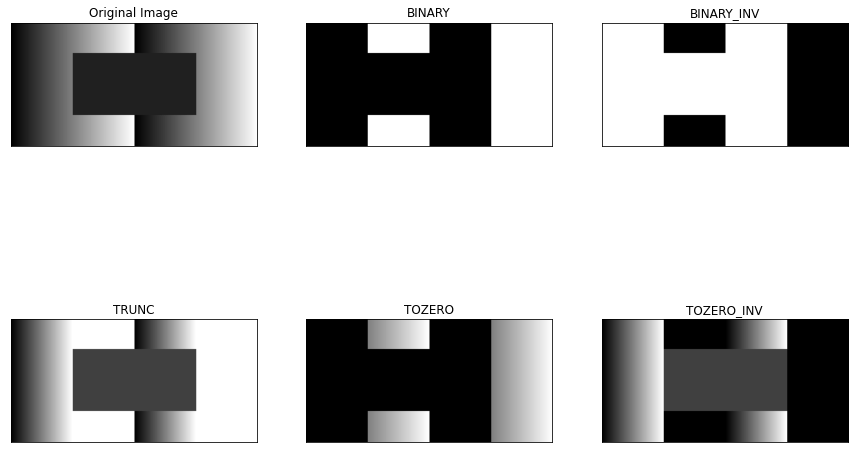

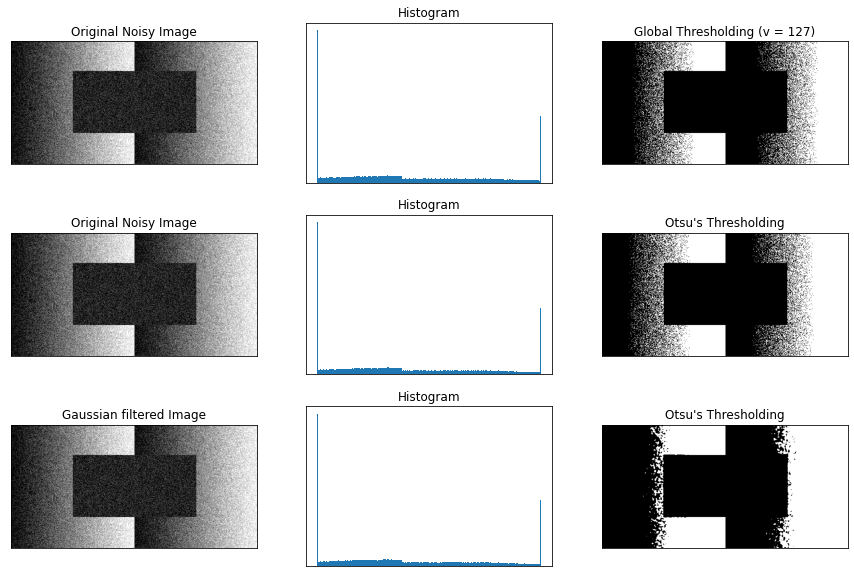

In [102]:
import cv2
import numpy as np
import random

h,w = 256, 512
img = np.zeros ((h,w), np.uint8)

for i in range (h) :
    for j in range (w) :
        img [i, j] = (j) % 256
        
for i in range (h//2) :
    for j in range (w//2) :
        img [i+h//4, j+w//4] = 32
        
noiseImg = np.copy(img)
m = 64
for i in range (h) :
    for j in range (w) :
        value = noiseImg [i, j] + random.randint(-m, m)
        if (value < 0) :
            noiseImg[i, j] = 0
        elif value > 255 :
            noiseImg[i, j] = 255            
        else :
            noiseImg[i, j] = value
            
plt.figure (figsize = (15, 10))

ret, thresh1 = cv2.threshold (img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold (img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold (img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold (img, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold (img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range (6) :
    plt.subplot (2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title (titles[i])
    plt.xticks ([]), plt.yticks([])
    
plt.show()
            
        
#global thresholding
ret1, th1 = cv2.threshold (noiseImg, 127, 255, cv2.THRESH_BINARY)

# Otsu's thresholding
ret2, th2 = cv2.threshold (noiseImg, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur (noiseImg, (5, 5), 0)
ret3, th3 = cv2.threshold (blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure (figsize = (15, 10))

# plot all the images and their histograms
images = [noiseImg, 0, th1,
         noiseImg, 0, th2,
         noiseImg, 0, th3]

titles = ['Original Noisy Image', 'Histogram', 'Global Thresholding (v = 127)',
         'Original Noisy Image', 'Histogram', "Otsu's Thresholding",
         'Gaussian filtered Image', 'Histogram', "Otsu's Thresholding"]

for i in range (3) :
    plt.subplot (3, 3, i*3+1), plt.imshow (images[i*3], 'gray')
    plt.title (titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot (3, 3, i*3+2), plt.hist (images[i*3].ravel(), 256)
    plt.title (titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot (3, 3, i*3+3), plt.imshow (images[i*3+2], 'gray')
    plt.title (titles[i*3+2]), plt.xticks([]), plt.yticks([])
    
plt.show()
        

In [77]:
import cv2
import numpy as np

img = cv2.imread ('sIMG_2180.jpg', 0)
blur = cv2.GaussianBlur (img, (5, 5), 0)

# find normalized_histogram, and its cumulative distribution function
hist = cv2.calcHist ([blur], [0], None, [256], [0, 256])
hist_norm = hist.ravel () / hist.max()
Q = hist_norm.cumsum()

bins = np.arange (256)

fn_min = np.inf
thresh = -1

for i in range (1, 256) :
    p1, p2 = np.hsplit (hist_norm, [i]) # probabilities
    q1, q2 = Q[i], Q[255]-Q[i] # cum sum of classes
    b1, b2 = np.hsplit(bins, [i]) # weight
    
    # finding means and variances
    m1, m2 = np.sum (p1*b1) / q1, np.sum(p2*b2) / q2
    v1, v2 = np.sum (((b1-m1) ** 2 ) * p1 ) / q1, np.sum (((b2-m2) ** 2) * p2) / q2
    
    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if (fn < fn_min) :
        fn_min = fn
        thresh = i
        
# find otsu's threshod value with OpenCV function
ret, otsu = cv2.threshold (blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print (thresh, ret)

121 120.0


<ipython-input-77-8364cd75cd39>:23: RuntimeWarning: invalid value encountered in double_scalars
  m1, m2 = np.sum (p1*b1) / q1, np.sum(p2*b2) / q2
<ipython-input-77-8364cd75cd39>:23: RuntimeWarning: divide by zero encountered in double_scalars
  m1, m2 = np.sum (p1*b1) / q1, np.sum(p2*b2) / q2
<ipython-input-77-8364cd75cd39>:24: RuntimeWarning: invalid value encountered in multiply
  v1, v2 = np.sum (((b1-m1) ** 2 ) * p1 ) / q1, np.sum (((b2-m2) ** 2) * p2) / q2


### Exercises
#### There are some optimizations available for Otsu's binarization. You can search and implement it.